In [1]:
# 测试反向求导功能
from core import *
import numpy as np

In [2]:
a = Tensor.from_numpy(np.array([1, 2], dtype=np.float32),dtype="float32")
b = Tensor.from_numpy(np.array([3, 4], dtype=np.float32),dtype="float32")

c = a + b

d = Tensor.from_numpy(numpy_array=np.array([2, 3], dtype=np.float32),dtype="float32")

e = c @ d

f = Tensor.make_const(np.array([1, 1], dtype=np.float32))

In [3]:
y = f + e

In [4]:
y.backward()

In [5]:
a.grad.data

array([2., 3.])

In [6]:
from DataTools import *

iris_dataset = DataSet(data_path='iris.csv', data_type='csv')

In [7]:
iris_loader = DataLoader(iris_dataset, batch_size=8, shuffle=True)

In [8]:
for data, labels in iris_loader:
    print(f"data: \n {data}, \n labels: \n {labels}")
    break

data: 
 [[114.    5.7   2.5   5.    2. ]
 [  7.    4.6   3.4   1.4   0.3]
 [118.    7.7   3.8   6.7   2.2]
 [ 55.    6.5   2.8   4.6   1.5]
 [  6.    5.4   3.9   1.7   0.4]
 [145.    6.7   3.3   5.7   2.5]
 [140.    6.9   3.1   5.4   2.1]
 [ 68.    5.8   2.7   4.1   1. ]], 
 labels: 
 ['virginica' 'setosa' 'virginica' 'versicolor' 'setosa' 'virginica'
 'virginica' 'versicolor']


In [9]:
mnist_dataset = DataSet(['train-images-idx3-ubyte', 'train-labels-idx1-ubyte'], data_type='mnist')

In [10]:
mnist_dataloader = DataLoader(mnist_dataset, batch_size=8, shuffle=True)

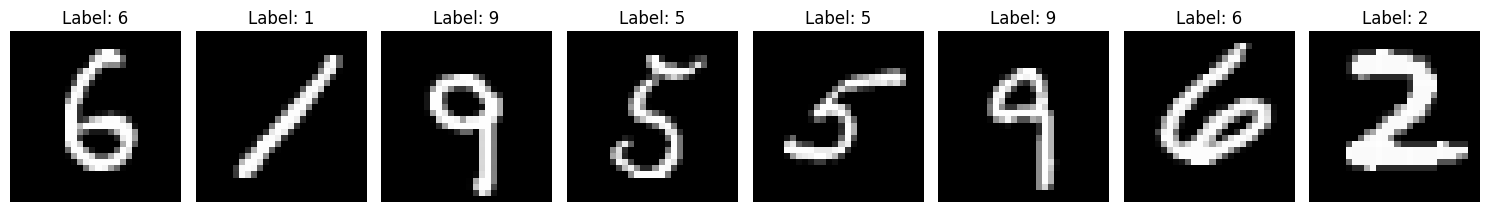

In [11]:
import matplotlib.pyplot as plt


for data, labels in mnist_dataloader:
    fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        img = data[i]
        if img.shape[0] == 1:
            img = img.squeeze(0)  # 去掉单通道维度

        ax.imshow(img, cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')  # 隐藏坐标轴

    plt.tight_layout()
    plt.show()
    break

In [12]:
class MyClass:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def display_attributes(self):
        print(self.__dict__)

# 创建对象
obj = MyClass(10, 20)

# 查看对象的属性
obj.display_attributes()

{'x': 10, 'y': 20}


In [13]:
class A:
    def __init__(self, x):
        self.x = x

    def __truediv__(self, other):
        return self.x / other.x
    
    def __add__(self, other):
        if isinstance(other, A):
            return self.x + other.x
        else:
            return self.x + other
    
    def __sub__(self, other):
        return self + (-other)
    


In [14]:
from Module import *
from Optimizer import *

In [15]:
train_dataset = DataSet(['train-images-idx3-ubyte', 'train-labels-idx1-ubyte'], data_type='mnist')
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)


test_dataset = DataSet(['t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte'], data_type='mnist')
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [16]:
def ResidualMLP(input_dim, hidden_dim, output_dim, num_blocks):
    net = Sequential(Linear(input_dim, hidden_dim), *[Residual(Linear(hidden_dim, hidden_dim)) for _ in range(num_blocks)], Linear(hidden_dim, output_dim), ReLU())
    return net

In [17]:
net = ResidualMLP(784, 128, 1, 3)
optimizer = SGD(net.parameters(), lr=0.01)
scheduler = ConstantScheduler(optimizer=optimizer, lr=0.01)
loss_fn = MSELoss()

In [22]:
num_epochs = 10
for epoch in range(num_epochs):
    for data, labels in train_loader:
        data = data.reshape(data.shape[0], -1)
        data = Tensor.make_const(data)
        print(f"data shape: {type(data)}")
        optimizer.reset_grad()
        output = net(data)
        loss = loss_fn(output, labels)
        loss.backward()
        optimizer.step()
        scheduler.step()

data shape: <class 'core.Tensor'>


In [27]:
data_test = (1,)

data_compute = [i + 1 for i in data_test]

In [28]:
data_compute

[2]